![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# TFM - Clustering

# *1. Librerías*

In [1]:
# Principales librerias
import pandas as pd
import numpy as np

# Visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.figure_factory as ff

# Forzar la recolección de basura
import gc
gc.collect()

# Configuración de las visualizaciones
pd.set_option('display.max_info_columns', 110 )
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)

# Modelos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.cluster.hierarchy as sch

# *2. Carga de datos*

In [4]:
df = pd.read_csv("./data/dfCluster_limpio.csv", index_col=False, low_memory=False)

# *3. Exploración de datos*

In [5]:
print(f"El DataFrame 'df' tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame 'df' tiene 9870 filas y 56 columnas.


In [6]:
df.head(2)

,hog_con_15_y_más,codigo_postal,serv_barrio,m2_por_hab,energia,habitantes,renta_bruta_media_por_persona,atrib_lujo,viv_nuevas_transacciones,planta,ins_comunitaria,atrib,num_personas,diferencia_precio_renta,estado,m2_areasverdes,cod_barrio,cod_distrito,m2_constr,habitaciones,total_transacciones,precio_mean_b,tamano_medio_del_hogar,total_estaciones,hog_con_10,eficiencia_carpinteria,lineas_metro,tam_hogar,amueblado,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,tipologia_Atico,tipologia_Piso,tipologia_infrequent_sklearn,antiguedad_10_30,antiguedad_30_50,antiguedad_Desconocido,antiguedad_mas_50,antiguedad_infrequent_sklearn,tipo_inmueble_Desconocido,tipo_inmueble_lujo,tipo_inmueble_infrequent_sklearn,aire_Desconocido,aire_Normal,aire_infrequent_sklearn,tipo_suelo_Desconocido,tipo_suelo_Madera,tipo_suelo_infrequent_sklearn,grupo_cocina_Desconocido,grupo_cocina_Independiente,grupo_cocina_infrequent_sklearn,target,tipologia_Chalet
0,0.55,0.04,-0.90,-0.25,0,1.63,-0.80,1,1.09,2.50,0,0.00,0.87,-0.56,-0.50,0.80,0.81,0.88,0.05,0.33,0.02,-0.59,0.77,1.05,1.95,0,-1.25,0.16,0.00,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,-0.31,0
1,0.00,-0.30,1.48,0.12,0,-0.13,0.58,0,0.70,1.00,0,1.05,-0.28,1.53,-0.50,-0.35,0.10,0.12,0.00,0.00,0.00,1.53,-0.51,-0.35,-0.54,0,0.75,0.11,0.10,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0.34,0


In [7]:
df.columns

Index(['hog_con_15_y_más', 'codigo_postal', 'serv_barrio', 'm2_por_hab',
       'energia', 'habitantes', 'renta_bruta_media_por_persona', 'atrib_lujo',
       'viv_nuevas_transacciones', 'planta', 'ins_comunitaria', 'atrib',
       'num_personas', 'diferencia_precio_renta', 'estado', 'm2_areasverdes',
       'cod_barrio', 'cod_distrito', 'm2_constr', 'habitaciones',
       'total_transacciones', 'precio_mean_b', 'tamano_medio_del_hogar',
       'total_estaciones', 'hog_con_10', 'eficiencia_carpinteria',
       'lineas_metro', 'tam_hogar', 'amueblado', 'certificado_energetico',
       'orientacion_este', 'orientacion_oeste', 'orientacion_sur',
       'orientacion_norte', 'tipologia_Atico', 'tipologia_Piso',
       'tipologia_infrequent_sklearn', 'antiguedad_10_30', 'antiguedad_30_50',
       'antiguedad_Desconocido', 'antiguedad_mas_50',
       'antiguedad_infrequent_sklearn', 'tipo_inmueble_Desconocido',
       'tipo_inmueble_lujo', 'tipo_inmueble_infrequent_sklearn',
       'aire_Desc

In [9]:
# Identificar los tipos de datos en el dataset
tipos_de_datos = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      30
float64    26
Name: count, dtype: int64.


In [10]:
# Verificar valores nulos por columna
valores_nulos = df.isnull().sum().sort_values(ascending=False)

print(f"El DataFrame 'df' tiene los siguientes valores nulos por columna:\n{valores_nulos}.")

El DataFrame 'df' tiene los siguientes valores nulos por columna:
hog_con_15_y_más                    0
codigo_postal                       0
serv_barrio                         0
m2_por_hab                          0
energia                             0
habitantes                          0
renta_bruta_media_por_persona       0
atrib_lujo                          0
viv_nuevas_transacciones            0
planta                              0
ins_comunitaria                     0
atrib                               0
num_personas                        0
diferencia_precio_renta             0
estado                              0
m2_areasverdes                      0
cod_barrio                          0
cod_distrito                        0
m2_constr                           0
habitaciones                        0
total_transacciones                 0
precio_mean_b                       0
tamano_medio_del_hogar              0
total_estaciones                    0
hog_con_10            

In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
hog_con_15_y_más,9870.00,-0.09,0.68,-1.60,-0.55,0.00,0.45,1.00
codigo_postal,9870.00,0.18,0.65,-0.69,-0.34,0.00,0.65,1.63
serv_barrio,9870.00,0.15,0.93,-1.31,-0.56,0.00,0.44,1.79
m2_por_hab,9870.00,0.29,1.47,-1.66,-0.39,-0.01,0.61,68.55
energia,9870.00,0.27,0.75,0.00,0.00,0.00,0.00,4.00
habitantes,9870.00,0.33,0.81,-1.65,-0.10,0.00,0.90,1.99
renta_bruta_media_por_persona,9870.00,0.04,0.53,-0.80,-0.42,0.00,0.58,0.91
atrib_lujo,9870.00,0.20,1.00,-1.00,0.00,0.00,1.00,6.00
viv_nuevas_transacciones,9870.00,0.94,3.04,-0.33,-0.24,0.00,0.76,32.03
planta,9870.00,0.30,1.11,-1.50,-0.50,0.00,0.50,12.50


In [12]:
# Cargar el archivo CSV
ruta_archivo = "./data/dfCluster_limpio.csv"
df = pd.read_csv(ruta_archivo)

# Obtener información general del dataset
info_df = df.info()
descripcion_df = df.describe(include='all')

# Mostrar las primeras filas para una vista rápida
primeras_filas = df.head()

# Devolver el resumen al usuario
info_df, descripcion_df, primeras_filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9870 entries, 0 to 9869
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hog_con_15_y_más                  9870 non-null   float64
 1   codigo_postal                     9870 non-null   float64
 2   serv_barrio                       9870 non-null   float64
 3   m2_por_hab                        9870 non-null   float64
 4   energia                           9870 non-null   int64  
 5   habitantes                        9870 non-null   float64
 6   renta_bruta_media_por_persona     9870 non-null   float64
 7   atrib_lujo                        9870 non-null   int64  
 8   viv_nuevas_transacciones          9870 non-null   float64
 9   planta                            9870 non-null   float64
 10  ins_comunitaria                   9870 non-null   int64  
 11  atrib                             9870 non-null   float64
 12  num_pe

(None,
        hog_con_15_y_más  codigo_postal  serv_barrio  m2_por_hab  energia  \
 count           9870.00        9870.00      9870.00     9870.00  9870.00   
 mean              -0.09           0.18         0.15        0.29     0.27   
 std                0.68           0.65         0.93        1.47     0.75   
 min               -1.60          -0.69        -1.31       -1.66     0.00   
 25%               -0.55          -0.34        -0.56       -0.39     0.00   
 50%                0.00           0.00         0.00       -0.01     0.00   
 75%                0.45           0.65         0.44        0.61     0.00   
 max                1.00           1.63         1.79       68.55     4.00   
 
        habitantes  renta_bruta_media_por_persona  atrib_lujo  \
 count     9870.00                        9870.00     9870.00   
 mean         0.33                           0.04        0.20   
 std          0.81                           0.53        1.00   
 min         -1.65                    

In [13]:
# Eliminar variables no útiles para el clustering
columnas_a_eliminar = [
    "codigo_postal", "cod_barrio", "cod_distrito"
] + [col for col in df.columns if "infrequent_sklearn" in col]

df_limpio = df.drop(columns=columnas_a_eliminar)

# Mostrar información del dataset ajustado
info_df_limpio = df_limpio.info()
descripcion_df_limpio = df_limpio.describe(include='all')

# Mostrar las primeras filas del dataset limpio
primeras_filas_limpio = df_limpio.head()

# Devolver el resumen al usuario
info_df_limpio, descripcion_df_limpio, primeras_filas_limpio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9870 entries, 0 to 9869
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hog_con_15_y_más               9870 non-null   float64
 1   serv_barrio                    9870 non-null   float64
 2   m2_por_hab                     9870 non-null   float64
 3   energia                        9870 non-null   int64  
 4   habitantes                     9870 non-null   float64
 5   renta_bruta_media_por_persona  9870 non-null   float64
 6   atrib_lujo                     9870 non-null   int64  
 7   viv_nuevas_transacciones       9870 non-null   float64
 8   planta                         9870 non-null   float64
 9   ins_comunitaria                9870 non-null   int64  
 10  atrib                          9870 non-null   float64
 11  num_personas                   9870 non-null   float64
 12  diferencia_precio_renta        9870 non-null   f

(None,
        hog_con_15_y_más  serv_barrio  m2_por_hab  energia  habitantes  \
 count           9870.00      9870.00     9870.00  9870.00     9870.00   
 mean              -0.09         0.15        0.29     0.27        0.33   
 std                0.68         0.93        1.47     0.75        0.81   
 min               -1.60        -1.31       -1.66     0.00       -1.65   
 25%               -0.55        -0.56       -0.39     0.00       -0.10   
 50%                0.00         0.00       -0.01     0.00        0.00   
 75%                0.45         0.44        0.61     0.00        0.90   
 max                1.00         1.79       68.55     4.00        1.99   
 
        renta_bruta_media_por_persona  atrib_lujo  viv_nuevas_transacciones  \
 count                        9870.00     9870.00                   9870.00   
 mean                            0.04        0.20                      0.94   
 std                             0.53        1.00                      3.04   
 min     

# *4. Reducción de dimensionalidad*

In [15]:
from sklearn.preprocessing import StandardScaler

# Identificar variables numéricas continuas (float64) y dummies (int64)
variables_numericas = df_limpio.select_dtypes(include=['float64']).columns
variables_dummies = df_limpio.select_dtypes(include=['int64']).columns

# Aplicar StandardScaler solo a las variables numéricas
scaler = StandardScaler()
df_limpio[variables_numericas] = scaler.fit_transform(df_limpio[variables_numericas])

# Mostrar un resumen de los datos escalados
descripcion_escalado = df_limpio.describe()

# Devolver el resumen al usuario
df_limpio.head()

,hog_con_15_y_más,serv_barrio,m2_por_hab,energia,habitantes,renta_bruta_media_por_persona,atrib_lujo,viv_nuevas_transacciones,planta,ins_comunitaria,atrib,num_personas,diferencia_precio_renta,estado,m2_areasverdes,m2_constr,habitaciones,total_transacciones,precio_mean_b,tamano_medio_del_hogar,total_estaciones,hog_con_10,eficiencia_carpinteria,lineas_metro,tam_hogar,amueblado,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,tipologia_Atico,tipologia_Piso,antiguedad_10_30,antiguedad_30_50,antiguedad_Desconocido,antiguedad_mas_50,tipo_inmueble_Desconocido,tipo_inmueble_lujo,aire_Desconocido,aire_Normal,tipo_suelo_Desconocido,tipo_suelo_Madera,grupo_cocina_Desconocido,grupo_cocina_Independiente,target,tipologia_Chalet
0,0.95,-1.12,-0.37,0,1.62,-1.57,1,0.05,1.99,0,-0.11,0.89,-1.02,-0.91,0.01,-0.24,0.04,-0.07,-1.03,1.08,0.96,2.11,0,-1.68,0.26,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,-0.58,0
1,0.14,1.43,-0.12,0,-0.57,1.01,0,-0.08,0.63,0,1.12,-0.59,2.09,-0.91,-0.40,-0.27,-0.37,-0.10,2.08,-0.75,-0.95,-0.73,0,1.74,0.19,0.01,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,-0.10,0
2,0.14,1.43,-0.29,0,-0.57,1.01,0,-0.39,-0.72,0,-0.70,-0.34,-0.11,2.36,-0.40,-0.06,0.45,-0.35,-0.10,-0.75,-0.95,-0.73,0,1.74,0.19,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0.06,0
3,0.80,-0.16,0.54,0,-0.54,-0.07,-1,-0.33,-0.27,0,-0.70,-1.39,-0.06,-0.91,-0.35,0.48,0.45,-1.05,-0.06,-1.64,-0.47,-0.12,0,0.88,1.42,-0.33,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1.30,0
4,-0.67,0.32,-0.39,0,-0.11,-0.53,-1,-0.37,-0.27,0,-0.11,-0.51,0.02,-0.91,-0.32,-0.65,-1.19,-0.20,0.01,-0.22,-0.89,0.64,0,0.45,0.24,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,-0.49,0


# *5. Clustering de viviendas*

## *5.1 dfCluster*

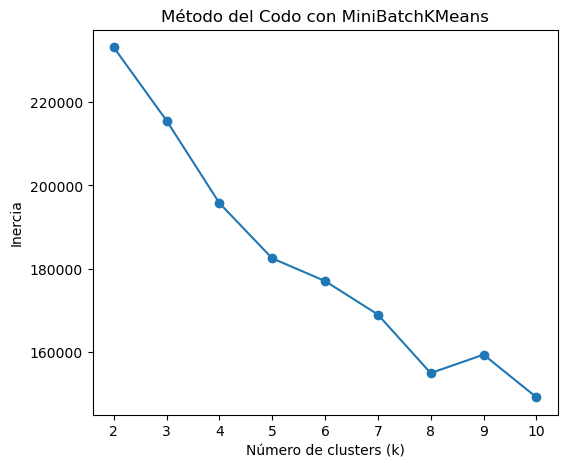

In [18]:
from sklearn.cluster import MiniBatchKMeans

# Definir un rango de valores de k a probar
rango_k = range(2, 11)  # Probamos de 2 a 10 clusters

# Reiniciar la lista de inercias
inercias = []

# Aplicar MiniBatchKMeans en diferentes valores de k
for k in rango_k:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256, n_init=10)
    mini_kmeans.fit(df_limpio)
    inercias.append(mini_kmeans.inertia_)

# Graficar el método del codo con MiniBatchKMeans
plt.figure(figsize=(6, 5))
plt.plot(rango_k, inercias, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con MiniBatchKMeans')
plt.show()

In [19]:
# Calcular la diferencia de inercias entre cada k para detectar el "codo"
diferencias = np.diff(inercias)

# Encontrar el índice donde la diferencia cambia más bruscamente
k_optimo = rango_k[np.argmin(diferencias) + 1]  # +1 porque np.diff reduce el tamaño en 1

k_optimo

4

In [20]:
# Aplicar MiniBatchKMeans con k=4
kmeans_final = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=256, n_init=10)
df_limpio['cluster'] = kmeans_final.fit_predict(df_limpio)

# Mostrar el resumen de la asignación de clusters
resumen_clusters = df_limpio['cluster'].value_counts().sort_index()

# Visualizar los datos con los clusters asignados
df_limpio.head()

,hog_con_15_y_más,serv_barrio,m2_por_hab,energia,habitantes,renta_bruta_media_por_persona,atrib_lujo,viv_nuevas_transacciones,planta,ins_comunitaria,atrib,num_personas,diferencia_precio_renta,estado,m2_areasverdes,m2_constr,habitaciones,total_transacciones,precio_mean_b,tamano_medio_del_hogar,total_estaciones,hog_con_10,eficiencia_carpinteria,lineas_metro,tam_hogar,amueblado,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,tipologia_Atico,tipologia_Piso,antiguedad_10_30,antiguedad_30_50,antiguedad_Desconocido,antiguedad_mas_50,tipo_inmueble_Desconocido,tipo_inmueble_lujo,aire_Desconocido,aire_Normal,tipo_suelo_Desconocido,tipo_suelo_Madera,grupo_cocina_Desconocido,grupo_cocina_Independiente,target,tipologia_Chalet,cluster
0,0.95,-1.12,-0.37,0,1.62,-1.57,1,0.05,1.99,0,-0.11,0.89,-1.02,-0.91,0.01,-0.24,0.04,-0.07,-1.03,1.08,0.96,2.11,0,-1.68,0.26,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,-0.58,0,3
1,0.14,1.43,-0.12,0,-0.57,1.01,0,-0.08,0.63,0,1.12,-0.59,2.09,-0.91,-0.40,-0.27,-0.37,-0.10,2.08,-0.75,-0.95,-0.73,0,1.74,0.19,0.01,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,-0.10,0,0
2,0.14,1.43,-0.29,0,-0.57,1.01,0,-0.39,-0.72,0,-0.70,-0.34,-0.11,2.36,-0.40,-0.06,0.45,-0.35,-0.10,-0.75,-0.95,-0.73,0,1.74,0.19,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0.06,0,0
3,0.80,-0.16,0.54,0,-0.54,-0.07,-1,-0.33,-0.27,0,-0.70,-1.39,-0.06,-0.91,-0.35,0.48,0.45,-1.05,-0.06,-1.64,-0.47,-0.12,0,0.88,1.42,-0.33,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1.30,0,0
4,-0.67,0.32,-0.39,0,-0.11,-0.53,-1,-0.37,-0.27,0,-0.11,-0.51,0.02,-0.91,-0.32,-0.65,-1.19,-0.20,0.01,-0.22,-0.89,0.64,0,0.45,0.24,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,-0.49,0,0


In [21]:
# Calcular las características promedio de cada cluster
resumen_clusters = df_limpio.groupby('cluster').mean()

# Visualizar los resultados
resumen_clusters


,hog_con_15_y_más,serv_barrio,m2_por_hab,energia,habitantes,renta_bruta_media_por_persona,atrib_lujo,viv_nuevas_transacciones,planta,ins_comunitaria,atrib,num_personas,diferencia_precio_renta,estado,m2_areasverdes,m2_constr,habitaciones,total_transacciones,precio_mean_b,tamano_medio_del_hogar,total_estaciones,hog_con_10,eficiencia_carpinteria,lineas_metro,tam_hogar,amueblado,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,tipologia_Atico,tipologia_Piso,antiguedad_10_30,antiguedad_30_50,antiguedad_Desconocido,antiguedad_mas_50,tipo_inmueble_Desconocido,tipo_inmueble_lujo,aire_Desconocido,aire_Normal,tipo_suelo_Desconocido,tipo_suelo_Madera,grupo_cocina_Desconocido,grupo_cocina_Independiente,target,tipologia_Chalet
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.17,0.59,-0.06,0.22,-0.46,0.56,-0.12,-0.26,0.08,0.04,0.02,-0.26,0.42,-0.09,-0.34,-0.12,-0.06,0.08,0.42,-0.88,-0.49,-0.43,0.24,0.82,0.58,0.19,0.18,0.06,0.05,0.07,0.03,0.04,0.91,0.02,0.03,0.69,0.25,0.78,0.19,0.73,0.27,0.90,0.09,0.91,0.03,0.04,0.00
1,0.47,-0.15,1.06,0.24,-0.34,0.95,0.99,-0.18,-0.23,0.02,0.12,-0.60,1.13,-0.01,1.33,1.54,1.43,-0.61,1.13,0.25,0.68,-0.56,0.51,0.35,-0.56,-0.04,0.19,0.05,0.06,0.11,0.03,0.04,0.64,0.05,0.05,0.64,0.24,0.62,0.36,0.65,0.34,0.88,0.11,0.86,0.07,1.56,0.03
2,-1.33,-0.60,-0.22,0.34,-0.63,-0.65,0.42,0.34,0.02,0.05,-0.04,-0.12,-0.67,0.15,-0.10,-0.29,-0.31,-0.32,-0.67,0.71,-0.65,-0.24,0.21,-0.83,-1.25,-0.13,0.19,0.06,0.05,0.07,0.04,0.05,0.88,0.06,0.07,0.65,0.21,0.89,0.03,0.79,0.21,0.83,0.11,0.90,0.05,-0.43,0.00
3,0.65,-0.44,-0.25,0.31,1.59,-0.92,0.18,0.26,-0.05,0.07,-0.06,0.91,-0.75,0.04,-0.00,-0.33,-0.37,0.47,-0.75,0.83,1.13,1.30,0.10,-0.93,0.39,-0.20,0.20,0.06,0.05,0.07,0.03,0.03,0.91,0.06,0.07,0.62,0.24,0.89,0.01,0.81,0.19,0.84,0.09,0.91,0.06,-0.51,0.00


Análisis de los Clusters
Cluster 0

    Menor nivel de renta y menor número de habitantes por vivienda.

    Mayor presencia de viviendas en mal estado o con menos atributos de lujo.

    Mayor porcentaje de viviendas en barrios con menor nivel de servicios.

    Predominan viviendas no amuebladas y con pocas características premium.

Cluster 1

    Mayor renta bruta media por persona y mayor porcentaje de viviendas de lujo.

    Más viviendas con aire acondicionado y acabados de calidad.

    Tiende a estar en zonas con mejor infraestructura y servicios.

    Probablemente representa zonas más exclusivas o con mayor demanda.

Cluster 2

    Baja renta y menor calidad de vivienda, similar al Cluster 0.

    Se diferencia porque tiene un mayor número de habitantes por vivienda.

    Muchas viviendas son más antiguas, con menor eficiencia energética.

    Podría representar barrios con viviendas más accesibles y familias grandes.

Cluster 3

    Similar al Cluster 1 pero con menor nivel de lujo.

    Zona intermedia: ni demasiado cara ni demasiado barata.

    Puede representar viviendas de clase media con servicios aceptables pero sin características premium.

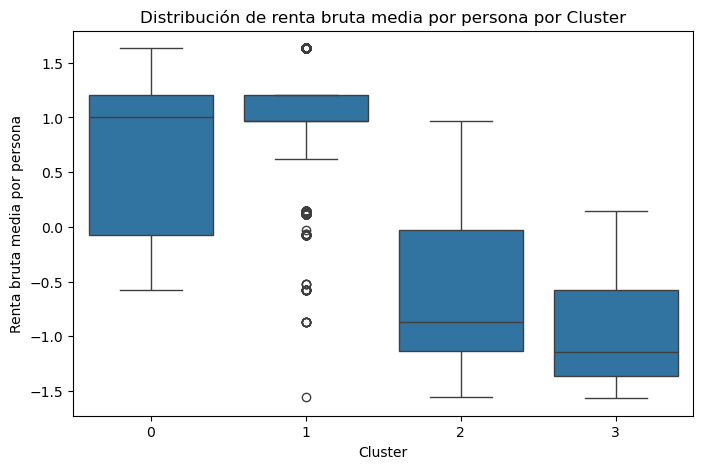

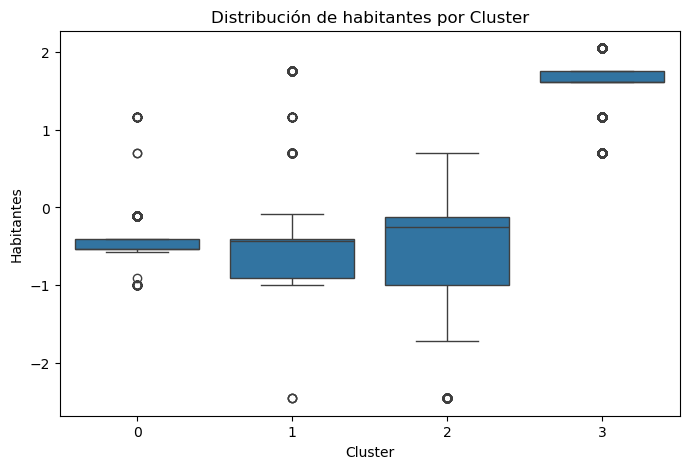

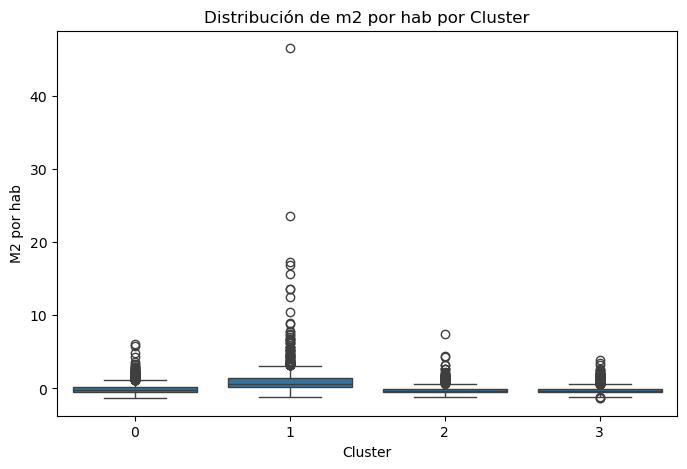

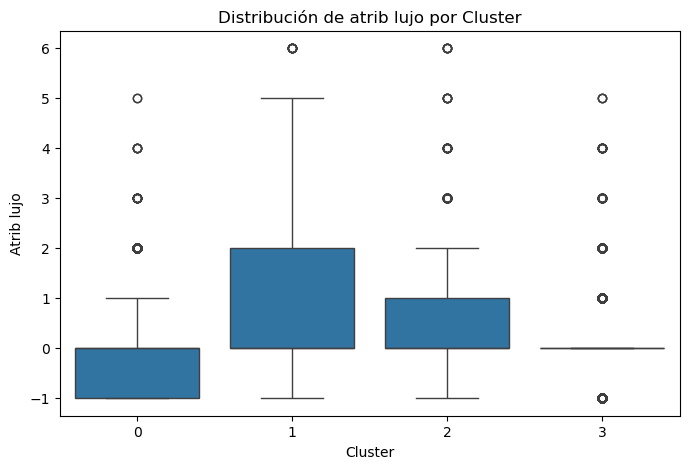

In [22]:
# Graficar la distribución de algunas variables clave por cluster
import seaborn as sns

# Variables clave para visualizar
variables_clave = ["renta_bruta_media_por_persona", "habitantes", "m2_por_hab", "atrib_lujo"]

# Crear gráficos de distribución por cluster
for var in variables_clave:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_limpio["cluster"], y=df_limpio[var])
    plt.xlabel("Cluster")
    plt.ylabel(var.replace("_", " ").capitalize())
    plt.title(f"Distribución de {var.replace('_', ' ')} por Cluster")
    plt.show()


In [23]:
# Cargar el dataset original para recuperar la columna 'cod_barrio'
df_original = pd.read_csv("./data/dfCluster_limpio.csv")

# Extraer solo la columna 'cod_barrio'
df_barrio = df_original[['cod_barrio']]

# Unir la columna 'cod_barrio' con los resultados del clustering
df_limpio = pd.concat([df_barrio, df_limpio], axis=1)

# Analizar la distribución de clusters por barrio
clusters_por_barrio = df_limpio.groupby("cod_barrio")["cluster"].value_counts().unstack().fillna(0)

# Visualizar los resultados
clusters_por_barrio.head()


cluster,0,1,2,3
cod_barrio,,,,
-0.66,258.00,5.00,6.00,0.00
-0.65,250.00,0.00,0.00,0.00
-0.64,176.00,7.00,0.00,0.00
-0.63,241.00,12.00,0.00,0.00
-0.61,408.00,3.00,0.00,0.00


In [25]:
# Ordenar los barrios por la cantidad de viviendas en cada cluster
ranking_barrios = clusters_por_barrio.idxmax(axis=1).value_counts()

# Crear un dataframe con el ranking de barrios según el cluster dominante
ranking_barrios_df = pd.DataFrame({'Cluster Dominante': ranking_barrios.index, 'Cantidad de Barrios': ranking_barrios.values})

# Visualizar los resultados
ranking_barrios_df


,Cluster Dominante,Cantidad de Barrios
0,2,54
1,3,36
2,0,28
3,1,13


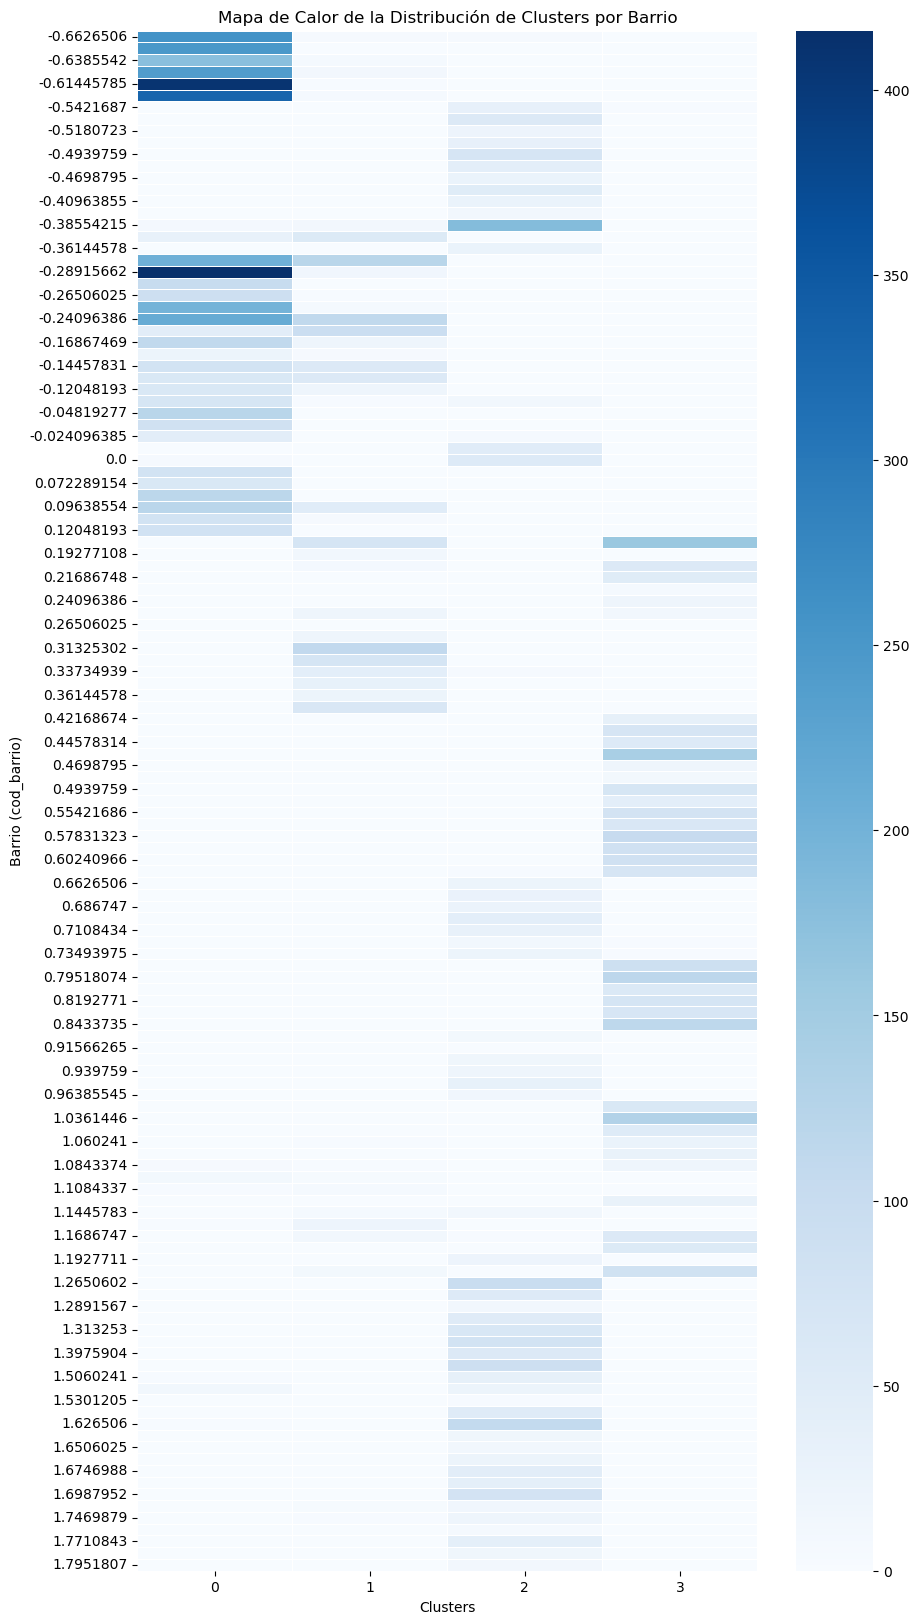

/var/folders/t0/kf4ls9ss5b12r0bynt2jdwgm0000gn/T/ipykernel_63189/1028093835.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




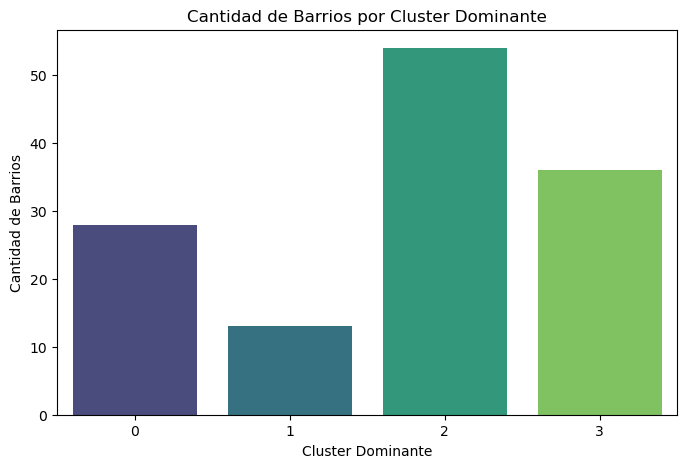

In [28]:
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 20))

# Crear un mapa de calor de la distribución de clusters por barrio
sns.heatmap(clusters_por_barrio, cmap="Blues", linewidths=0.5, annot=False)

# Etiquetas y título
plt.xlabel("Clusters")
plt.ylabel("Barrio (cod_barrio)")
plt.title("Mapa de Calor de la Distribución de Clusters por Barrio")

# Mostrar el gráfico
plt.show()

# Crear gráfico de barras de la cantidad de barrios por cluster dominante
plt.figure(figsize=(8, 5))
sns.barplot(x=ranking_barrios_df["Cluster Dominante"], y=ranking_barrios_df["Cantidad de Barrios"], palette="viridis")

# Etiquetas y título
plt.xlabel("Cluster Dominante")
plt.ylabel("Cantidad de Barrios")
plt.title("Cantidad de Barrios por Cluster Dominante")

# Mostrar el gráfico
plt.show()


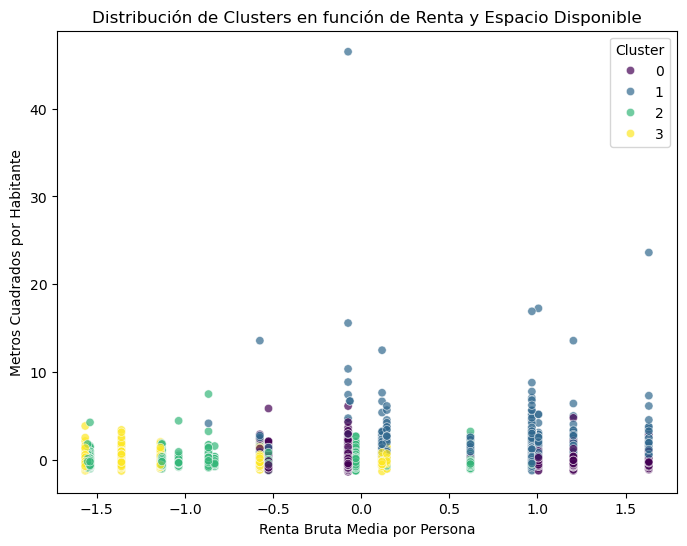

In [29]:
# Crear un gráfico de dispersión de los clusters en función de dos variables clave
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_limpio["renta_bruta_media_por_persona"], 
                y=df_limpio["m2_por_hab"], 
                hue=df_limpio["cluster"], 
                palette="viridis", 
                alpha=0.7)

# Etiquetas y título
plt.xlabel("Renta Bruta Media por Persona")
plt.ylabel("Metros Cuadrados por Habitante")
plt.title("Distribución de Clusters en función de Renta y Espacio Disponible")
plt.legend(title="Cluster")

# Mostrar el gráfico
plt.show()


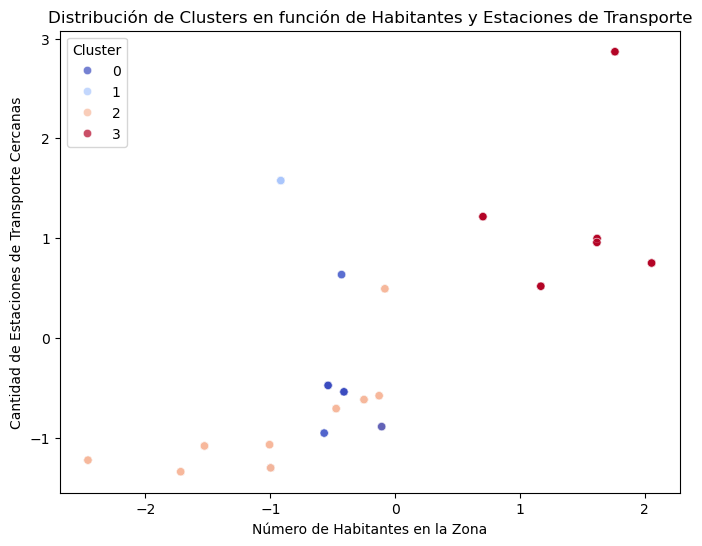

In [30]:
# Crear un gráfico de dispersión con variables que expliquen las viviendas por zonas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_limpio["habitantes"], 
                y=df_limpio["total_estaciones"], 
                hue=df_limpio["cluster"], 
                palette="coolwarm", 
                alpha=0.7)

# Etiquetas y título
plt.xlabel("Número de Habitantes en la Zona")
plt.ylabel("Cantidad de Estaciones de Transporte Cercanas")
plt.title("Distribución de Clusters en función de Habitantes y Estaciones de Transporte")
plt.legend(title="Cluster")

# Mostrar el gráfico
plt.show()


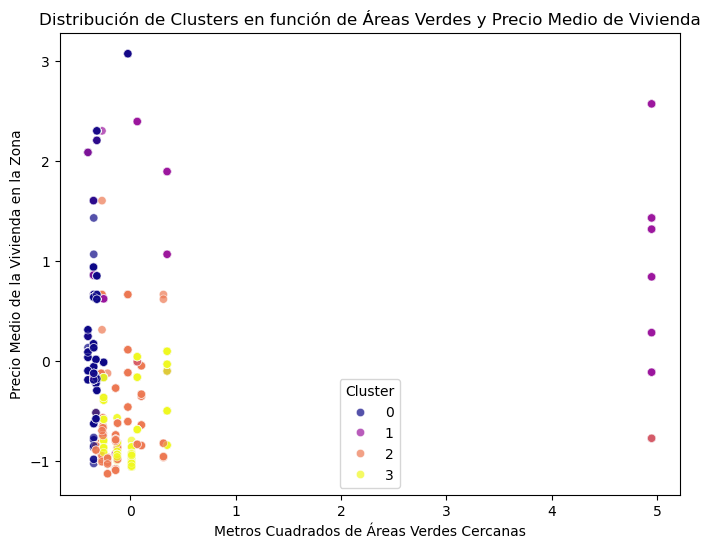

In [31]:
# Crear un gráfico de dispersión con otra combinación de variables relacionadas con zonas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_limpio["m2_areasverdes"], 
                y=df_limpio["precio_mean_b"], 
                hue=df_limpio["cluster"], 
                palette="plasma", 
                alpha=0.7)

# Etiquetas y título
plt.xlabel("Metros Cuadrados de Áreas Verdes Cercanas")
plt.ylabel("Precio Medio de la Vivienda en la Zona")
plt.title("Distribución de Clusters en función de Áreas Verdes y Precio Medio de Vivienda")
plt.legend(title="Cluster")

# Mostrar el gráfico
plt.show()


In [35]:
# Volver a cargar el dataset original para recuperar los valores originales
df_original = pd.read_csv("./data/dfCluster_limpio.csv")

# Extraer solo las variables numéricas continuas originales
df_numerico_original = df_original[variables_numericas]

# Aplicar la transformación inversa para desnormalizar
df_numerico_desnormalizado = pd.DataFrame(scaler.inverse_transform(df_limpio[variables_numericas]), 
                                          columns=variables_numericas)

# Reemplazar los valores en el dataset limpio con los valores originales
df_desnormalizado = df_limpio.copy()
df_desnormalizado[variables_numericas] = df_numerico_desnormalizado

# Visualizar el dataset con valores originales
df_desnormalizado.head()


,cod_barrio,hog_con_15_y_más,serv_barrio,m2_por_hab,energia,habitantes,renta_bruta_media_por_persona,atrib_lujo,viv_nuevas_transacciones,planta,ins_comunitaria,atrib,num_personas,diferencia_precio_renta,estado,m2_areasverdes,m2_constr,habitaciones,total_transacciones,precio_mean_b,tamano_medio_del_hogar,total_estaciones,hog_con_10,eficiencia_carpinteria,lineas_metro,tam_hogar,amueblado,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,tipologia_Atico,tipologia_Piso,antiguedad_10_30,antiguedad_30_50,antiguedad_Desconocido,antiguedad_mas_50,tipo_inmueble_Desconocido,tipo_inmueble_lujo,aire_Desconocido,aire_Normal,tipo_suelo_Desconocido,tipo_suelo_Madera,grupo_cocina_Desconocido,grupo_cocina_Independiente,target,tipologia_Chalet,cluster
0,0.81,0.95,-1.12,-0.37,0,1.62,-1.57,1,0.05,1.99,0,-0.11,0.89,-1.02,-0.91,0.01,-0.24,0.04,-0.07,-1.03,1.08,0.96,2.11,0,-1.68,0.26,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,-0.58,0,3
1,0.10,0.14,1.43,-0.12,0,-0.57,1.01,0,-0.08,0.63,0,1.12,-0.59,2.09,-0.91,-0.40,-0.27,-0.37,-0.10,2.08,-0.75,-0.95,-0.73,0,1.74,0.19,0.01,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,-0.10,0,0
2,0.06,0.14,1.43,-0.29,0,-0.57,1.01,0,-0.39,-0.72,0,-0.70,-0.34,-0.11,2.36,-0.40,-0.06,0.45,-0.35,-0.10,-0.75,-0.95,-0.73,0,1.74,0.19,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0.06,0,0
3,-0.60,0.80,-0.16,0.54,0,-0.54,-0.07,-1,-0.33,-0.27,0,-0.70,-1.39,-0.06,-0.91,-0.35,0.48,0.45,-1.05,-0.06,-1.64,-0.47,-0.12,0,0.88,1.42,-0.33,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1.30,0,0
4,-0.04,-0.67,0.32,-0.39,0,-0.11,-0.53,-1,-0.37,-0.27,0,-0.11,-0.51,0.02,-0.91,-0.32,-0.65,-1.19,-0.20,0.01,-0.22,-0.89,0.64,0,0.45,0.24,-0.33,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,-0.49,0,0


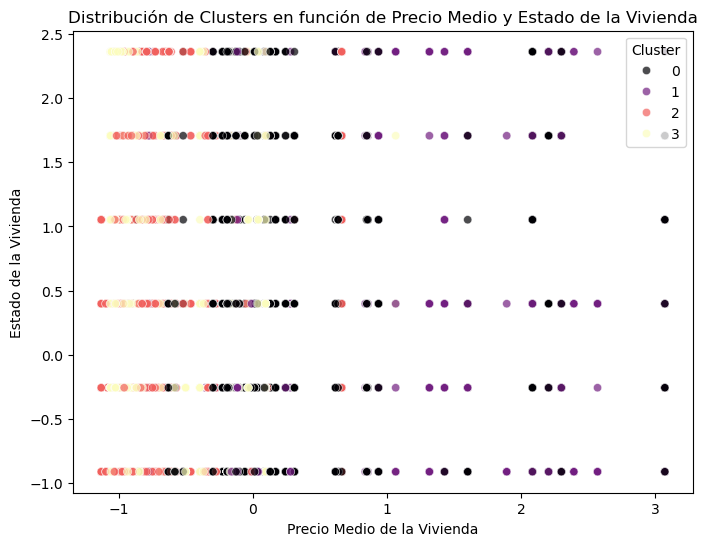

In [36]:
# Crear un gráfico de dispersión con los valores desnormalizados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_desnormalizado["precio_mean_b"], 
                y=df_desnormalizado["estado"], 
                hue=df_desnormalizado["cluster"], 
                palette="magma", 
                alpha=0.7)

# Etiquetas y título
plt.xlabel("Precio Medio de la Vivienda")
plt.ylabel("Estado de la Vivienda")
plt.title("Distribución de Clusters en función de Precio Medio y Estado de la Vivienda")
plt.legend(title="Cluster")

# Mostrar el gráfico
plt.show()


### *5.1.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*
- Útil cuando hay clusters de forma irregular o con ruido.
- No requiere definir el número de clusters, pero es sensible a los parámetros eps y min_samples.

### *5.1.3 Agglomerative Clustering (Jerárquico)*
- No requiere definir el número de clusters antes de tiempo.
- Útil para ver estructuras jerárquicas en los datos.

### *5.1.4 Comparación de métodos*

## *5.2 dfCluster_sinencode*

### *5.2.1 K-Means*

### *5.2.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*

### *5.2.3 Agglomerative Clustering (Jerárquico)*

### *5.2.4 Comparación de métodos*

## *6. Interpretación de Clusters*

### *6.1 Análisis de características*

### *6.2 Validación de la calidad de los Clusters*

### *6.3 Aplicación del resultado a la problemática*